# Question 1

#### Step 1. Import the necessary libraries

In [316]:
import pandas as pd

#### Step 2. Import the dataset from this address.
#### Step 3. Assign it to a variable called users

In [315]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### Step 4. Discover what is the mean age per occupation

In [12]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [318]:
genders = users.groupby("occupation")["gender"].value_counts().sort_values(ascending=True)
genders

occupation     gender
technician     F           1
homemaker      M           1
retired        F           1
lawyer         F           2
entertainment  F           2
engineer       F           2
executive      F           3
scientist      F           3
salesman       F           3
none           F           4
               M           5
healthcare     M           5
homemaker      F           6
programmer     F           6
doctor         M           7
salesman       M           9
lawyer         M          10
marketing      F          10
healthcare     F          11
artist         F          13
retired        M          13
artist         M          15
marketing      M          16
entertainment  M          16
writer         F          19
librarian      M          22
writer         M          26
educator       F          26
technician     M          26
scientist      M          28
librarian      F          29
executive      M          29
other          F          36
administrator  F     

#### Step 6. For each occupation, calculate the minimum and maximum ages 

In [319]:
users.groupby("occupation").age.agg([min, max]).head()

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70


#### Step 7. For each combination of occupation and gender, calculate the mean age

In [320]:
users.groupby(["occupation", "gender"]).age.mean().head(5)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
Name: age, dtype: float64

#### Step 8. For each occupation present the percentage of women and men

In [324]:
gender_occupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occup_count = users.groupby(['occupation']).agg('count')

occup_gender = gender_occupation.div(occup_count, level = "occupation") * 100

occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

#### Step 1. Import the necessary libraries

In [32]:
import pandas as pd

#### Step 2. Import the dataset from this address
#### Step 3. Assign it to a variable called euro12

In [35]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


#### Step 4. Select only the Goal column

In [40]:
goal_column = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', usecols=['Goals'])
goal_column

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


#### Step 5. How many team participated in the Euro2012?

In [48]:
total_team = len(euro12['Team'])
print(f'{total_team} team participated in the Euro2012')

16 team participated in the Euro2012


#### Step 6. What is the number of columns in the dataset?

In [52]:
total_col = len(euro12.axes[1])
print("Total number of column in the dataset are", total_col)

Total number of column in the dataset are 35


#### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [326]:
view_selected= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', usecols = ['Team', 'Yellow Cards', 'Red Cards'])
discipline = pd.DataFrame(view_selected)
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [63]:
sort_by_yellow_team = discipline.sort_values(by = 'Yellow Cards')
sort_by_red_team = discipline.sort_values(by = 'Red Cards')

print("Sort by Red Team \n",sort_by_red_team)
print("sort By Yellow Cards \n",sort_by_yellow_team)

Sort by Red Team 
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
7                 Italy            16          0
8           Netherlands             5          0
10             Portugal            12          0
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
sort By Yellow Cards 
                    Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany    

#### Step 9. Calculate the mean Yellow Cards given per Team

In [327]:
print("Yellow Cards mean per Team", discipline["Yellow Cards"].mean())

Yellow Cards mean per Team 7.4375


#### Step 10.  Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

In [330]:
goal_g_6 = euro12[euro12["Goals"] >= 6]
goal_g_6

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### Step 12. Select the first 7 columns

In [331]:
select_first_7_columns = euro12.iloc[:,0:8]
select_first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork
0,Croatia,4,13,12,51.9%,16.0%,32,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0
2,Denmark,4,10,10,50.0%,20.0%,27,1
3,England,5,11,18,50.0%,17.2%,40,0
4,France,3,22,24,37.9%,6.5%,65,1
5,Germany,10,32,32,47.8%,15.6%,80,2
6,Greece,5,8,18,30.7%,19.2%,32,1
7,Italy,6,34,45,43.0%,7.5%,110,2
8,Netherlands,2,12,36,25.0%,4.1%,60,2
9,Poland,2,15,23,39.4%,5.2%,48,0


#### Step 13. Select all columns except the last 3

In [332]:
last_3_unselect= euro12.iloc[:,0:32]
last_3_unselect

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [333]:
shooting_accuracy_data = euro12.loc[:,['Team','Shooting Accuracy']]
shooting_accuracy_data

,Team,Shooting Accuracy
0,Croatia,51.9%
1,Czech Republic,41.9%
2,Denmark,50.0%
3,England,50.0%
4,France,37.9%
5,Germany,47.8%
6,Greece,30.7%
7,Italy,43.0%
8,Netherlands,25.0%
9,Poland,39.4%


# Question 3

In [99]:
import pandas as pd
import numpy as np

#### Create 3 differents Series, each of length 100

In [100]:
series_1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series_2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series_3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print("series1")
print(series_1,"\n\n")
print("series2")
print(series_2,"\n\n")
print("series3")
print(series_3,"\n\n")

series1
0     3
1     4
2     2
3     4
4     4
     ..
95    3
96    4
97    1
98    2
99    4
Length: 100, dtype: int32 


series2
0     1
1     1
2     2
3     3
4     1
     ..
95    1
96    2
97    1
98    1
99    3
Length: 100, dtype: int32 


series3
0     14418
1     20820
2     20027
3     29927
4     16419
      ...  
95    21435
96    20182
97    18162
98    19446
99    26203
Length: 100, dtype: int32 




#### Step 3. Create a DataFrame by joinning the Series by column

In [104]:
joining_columns = pd.concat([series_1, series_2, series_3], axis=1)
joining_columns.head()

,0,1,2
0,3,1,14418
1,4,1,20820
2,2,2,20027
3,4,3,29927
4,4,1,16419


#### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [105]:
joining_columns.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
joining_columns.head()

,bedrs,bathrs,price_sqr_meter
0,3,1,14418
1,4,1,20820
2,2,2,20027
3,4,3,29927
4,4,1,16419


#### Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [106]:
bigcolumn = pd.concat([series_1, series_2, series_3], axis=0)

bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,3
1,4
2,2
3,4
4,4
...,...
95,21435
96,20182
97,18162
98,19446


#### Step 6. Ops it seems it is going only until index 99. Is it true?

In [337]:
# no the index are kept but the length of the DataFrame is 300 as we can see by len()

len(bigcolumn)

300

#### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [338]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,4
2,2
3,4
4,4
...,...
295,21435
296,20182
297,18162
298,19446


## Question 4

In [116]:
import pandas as pd
import datetime


#### Step 2. Import the dataset from the attached file wind.txt
#### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [342]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [343]:

def fix_2061(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)


data['Y_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_2061)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Y_Mo_Dy
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


#### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [345]:
# transform Yr_Mo_Dy it to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Y_Mo_Dy
Yr_Mo_Dy,,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


#### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below

In [131]:
data.isnull().sum()

RPT        6
VAL        3
ROS        2
KIL        5
SHA        2
BIR        0
DUB        3
CLA        2
MUL        3
CLO        1
BEL        0
MAL        4
Y_M_D      0
Y_Mo_Dy    0
dtype: int64

#### Step 7. Compute how many non-missing values there are in total.

In [346]:
data.notnull().sum()

RPT        6568
VAL        6571
ROS        6572
KIL        6569
SHA        6572
BIR        6574
DUB        6571
CLA        6572
MUL        6571
CLO        6573
BEL        6574
MAL        6570
Y_Mo_Dy    6574
dtype: int64

#### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [347]:
data.sum().sum() / data.notna().sum().sum()

C:\Users\rahin\AppData\Local\Temp/ipykernel_23400/3005791036.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.sum().sum() / data.notna().sum().sum()


9.440837986211093

###### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

#### Step 10.  Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day

In [134]:
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

C:\Users\rahin\AppData\Local\Temp/ipykernel_23400/3990649138.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['min'] = data.min(axis = 1) # min
C:\Users\rahin\AppData\Local\Temp/ipykernel_23400/3990649138.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['max'] = data.max(axis = 1) # max
C:\Users\rahin\AppData\Local\Temp/ipykernel_23400/3990649138.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  day_stats['mean'] = data.mean(axis = 1) # mean
C:\Users\rahin\A

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


###### Step 11. Find the average windspeed in January for each location.
###### Treat January 1961 and January 1962 both as January.

In [138]:
data.head(2)
data.loc[data.index.month == 1].mean()

C:\Users\rahin\AppData\Local\Temp/ipykernel_23400/961224589.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data.index.month == 1].mean()


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

###### Step 12. Downsample the record to a yearly frequency for each location

In [141]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


###### Step 13. Downsample the record to a monthly frequency for each location.

In [142]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


###### Step 14. Downsample the record to a weekly frequency for each location.

In [143]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


###### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [144]:
# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])

# slice it for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

## Question 5

In [145]:
import pandas as pd

#### Step 3. Assign it to a variable called chipo.

In [147]:
data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(data_url, sep = '\t')
chipo.head(2)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39


#### Step 4. See the first 10 entries

In [148]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5. What is the number of observations in the dataset?

In [152]:
chipo.shape[0] #0 means row

4622

#### Step 6. What is the number of columns in the dataset?

In [349]:
chipo.shape[1] #1 means column

5

#### Step 7. Print the name of all the columns.

In [154]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Step 8. How is the dataset indexed?

In [155]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9. Which was the most-ordered item?

In [350]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

#### Step 10. For the most-ordered item, how many items were ordered?

In [159]:
chipo.item_name.unique().shape[0]

50

#### Step 11. What was the most ordered item in the choice_description column?

In [160]:
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

#### Step 12. How many items were orderd in total?

In [161]:
chipo.quantity.sum()

4972

#### Step 14. How much was the revenue for the period in the dataset?

In [163]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### Step 15. How many orders were made in the period?

In [168]:
chipo['item_price']=chipo.apply(lambda x: float(x[1:-1]))
chipo

TypeError: cannot convert the series to <class 'float'>

#### Step 16. What is the average revenue amount per order?

In [170]:
average_revenue = chipo.groupby(by=['order_id']).sum()
average_revenue['quantity'].mean()

2.711014176663032

### Step 17. How many different items are sold?

# Question 6

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [352]:
us_marriage_divorce_data_1867 = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = us_marriage_divorce_data_1867['Year'].values
marriages_per_capita = us_marriage_divorce_data_1867['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data_1867['Divorces_per_1000'].values

<IPython.core.display.Javascript object>


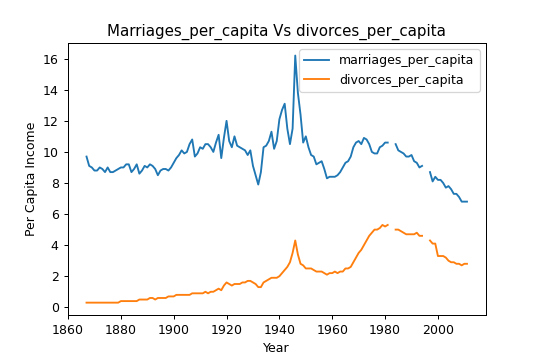

In [353]:
plt.plot(years, marriages_per_capita, label='marriages_per_capita')

plt.plot(years, divorces_per_capita, label='divorces_per_capita')

plt.title('Marriages_per_capita Vs divorces_per_capita')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend()
plt.show()

# Question 7

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

In [300]:
us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

<IPython.core.display.Javascript object>


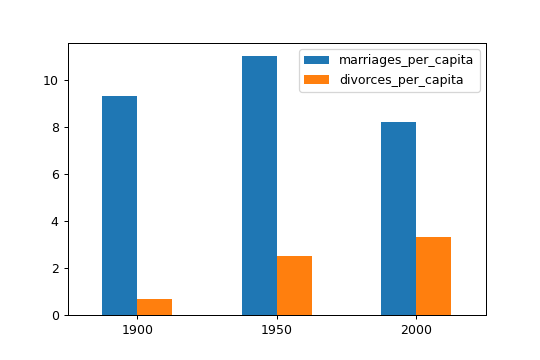

In [301]:
df = pd.DataFrame({'marriages_per_capita': marriages_per_capita,
                   'divorces_per_capita': divorces_per_capita}, index=years)
ax = df.plot.bar(rot=0)

# Question 8

In [302]:
import pandas as pd
import matplotlib.pyplot as plt

hollywood_actor_csv = pd.read_csv('actor_kill_counts.csv')

actor_names = hollywood_actor_csv['Actor'].values
kill_counts = hollywood_actor_csv['Count'].values

<IPython.core.display.Javascript object>


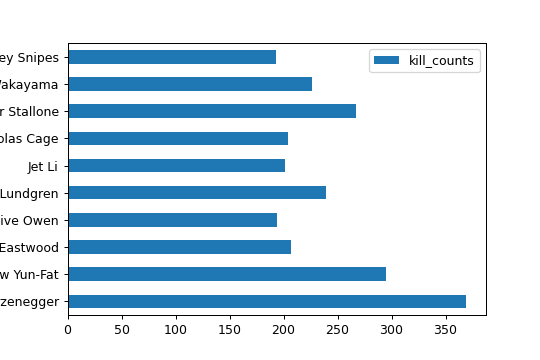

In [303]:
df = pd.DataFrame({'actor_names': actor_names,
                   'kill_counts': kill_counts},index=actor_names)
ax = df.plot.barh()

# Question 9
### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

In [304]:
import pandas as pd

roman_emperors_reigns = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors_reigns[
    roman_emperors_reigns['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(roman_emperors_reigns) - number_assassinated

In [305]:
number_assassinated
other_deaths

38

In [306]:
df = pd.DataFrame({'number_assassinated': number_assassinated,
                   'other_deaths': other_deaths},index=['number_assassinated', 'other_deaths'])


<IPython.core.display.Javascript object>


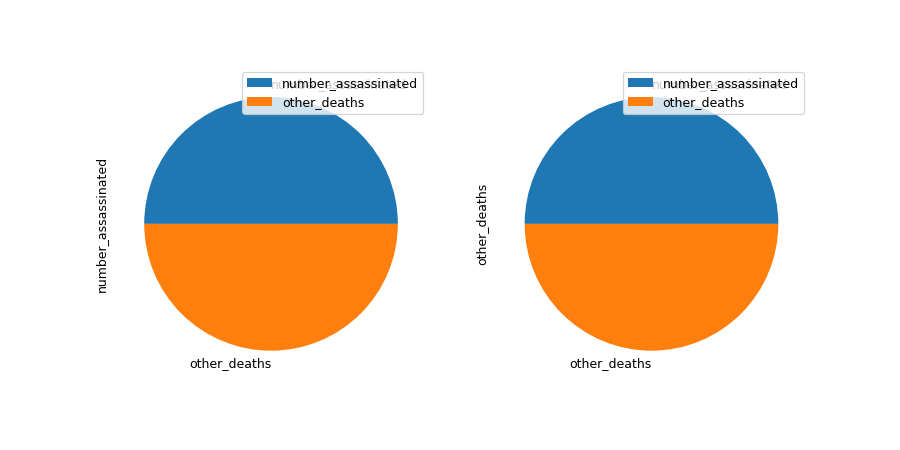

In [307]:
plot = df.plot.pie(subplots=True,figsize=(10, 5))

## Question 10
#### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

In [308]:
import pandas as pd

arcade_revenue_csv = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

arcade_revenue = arcade_revenue_csv['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = arcade_revenue_csv[
    'Computer Science Doctorates Awarded (US)'].values

In [309]:
arcade_revenue

array([1.196, 1.176, 1.269, 1.24 , 1.307, 1.435, 1.601, 1.654, 1.803,
       1.734])

In [310]:
cs_doctorates_awarded

array([ 861,  830,  809,  867,  948, 1129, 1453, 1656, 1787, 1611],
      dtype=int64)

<IPython.core.display.Javascript object>


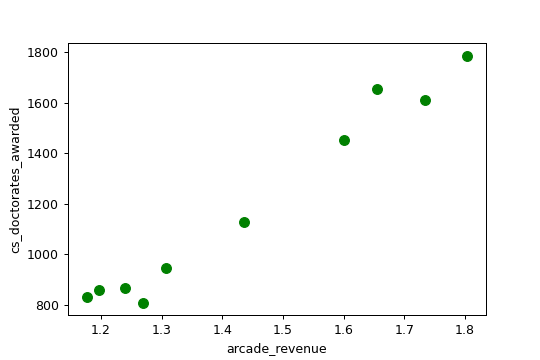

<AxesSubplot:xlabel='arcade_revenue', ylabel='cs_doctorates_awarded'>

In [311]:
#create DataFrame
df = pd.DataFrame({'arcade_revenue': arcade_revenue,
                   'cs_doctorates_awarded': cs_doctorates_awarded})

#create scatterplot
df.plot.scatter(x='arcade_revenue', y='cs_doctorates_awarded',s=60, c='green')